In [1]:
## ............ Importing libraries ............ ##
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")       

In [2]:
## ........... Importing dataset ............ ##
df = pd.read_csv("E:/MLOps Projects/1. Udemy_MLOps/1. Hotel reservation Prediction\Project Implementation/artifacts/raw/train.csv")
print(df.shape)
df.head()

(29020, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [3]:
## ........... Data Preprocessing ............ ##

## Droping unnecessary columns
df.drop(columns=["Booking_ID"], inplace=True)
print(df.shape)

## Check for null values
print(df.isnull().sum())

## Check for duplicate values
print(df.drop_duplicates(inplace=True))
print(df.shape)

(29020, 18)
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
None
(21359, 18)


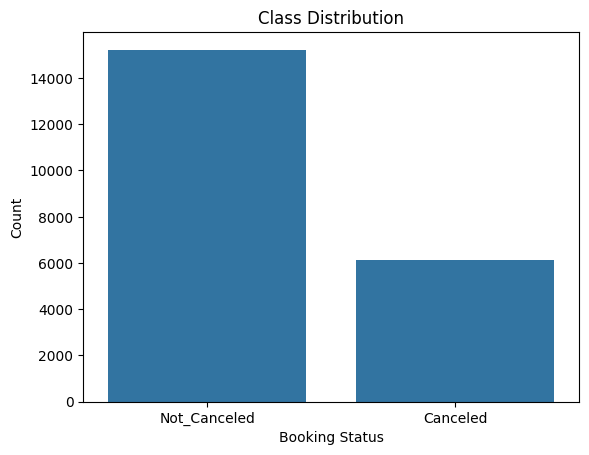

Huge imbalance in the dataset


In [4]:
## Checking Class Distribution
sns.countplot(x="booking_status", data=df)
plt.title("Class Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")

plt.show()

print('Huge imbalance in the dataset')

In [5]:
## Differentiate between categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Categorical Columns: {len(categorical_cols)}", categorical_cols)
print(f"Numerical Columns: {len(numerical_cols)}", numerical_cols)

Categorical Columns: 4 ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical Columns: 14 ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


## EDA 

### UNIVARIATE ANALYSIS (All Numerical Columns)

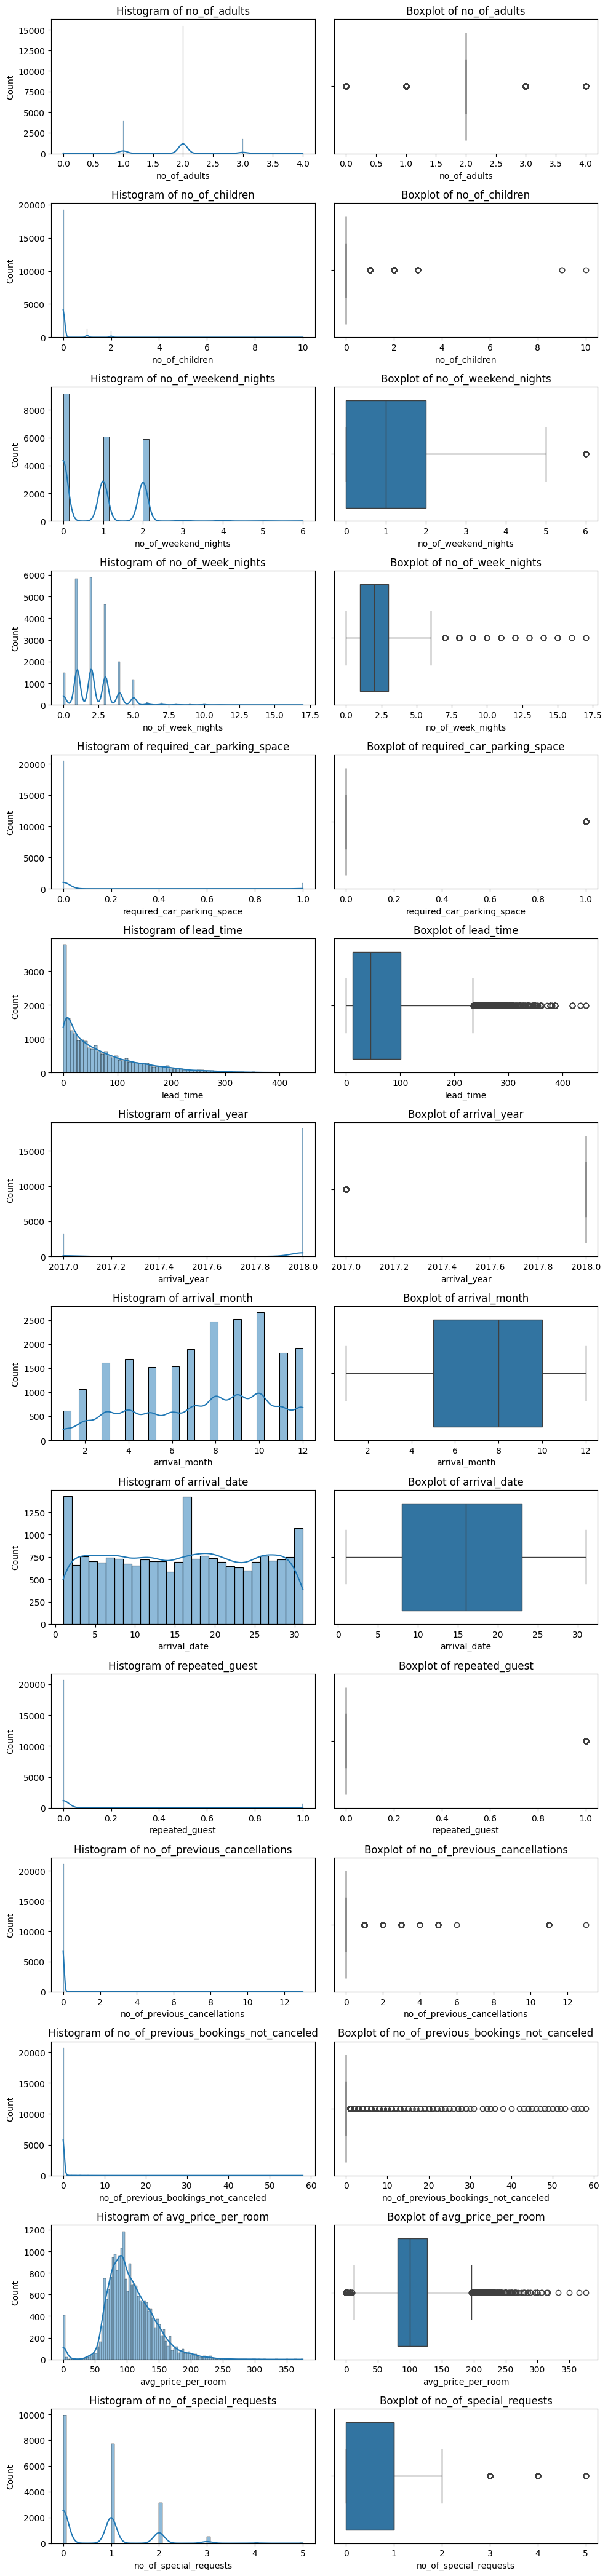

In [6]:
## ..................Combined Histograms and Boxplots.................. ##

def plot_combined(df, numerical_cols):
    fig, ax = plt.subplots(len(numerical_cols), 2, figsize=(10, len(numerical_cols) * 3))
    ax = ax.ravel()

    if len(numerical_cols) == 0:
        print("No numerical columns to plot.")
        return

    for i, col in enumerate(numerical_cols):
        # Plot histogram
        sns.histplot(df[col], kde=True, ax=ax[2 * i])
        ax[2 * i].set_title(f"Histogram of {col}")

        # Plot boxplot
        sns.boxplot(data=df, x=col, ax=ax[2 * i + 1])
        ax[2 * i + 1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

plot_combined(df, numerical_cols)


### UNIVARIATE ANALYSIS (All Categorical Columns)

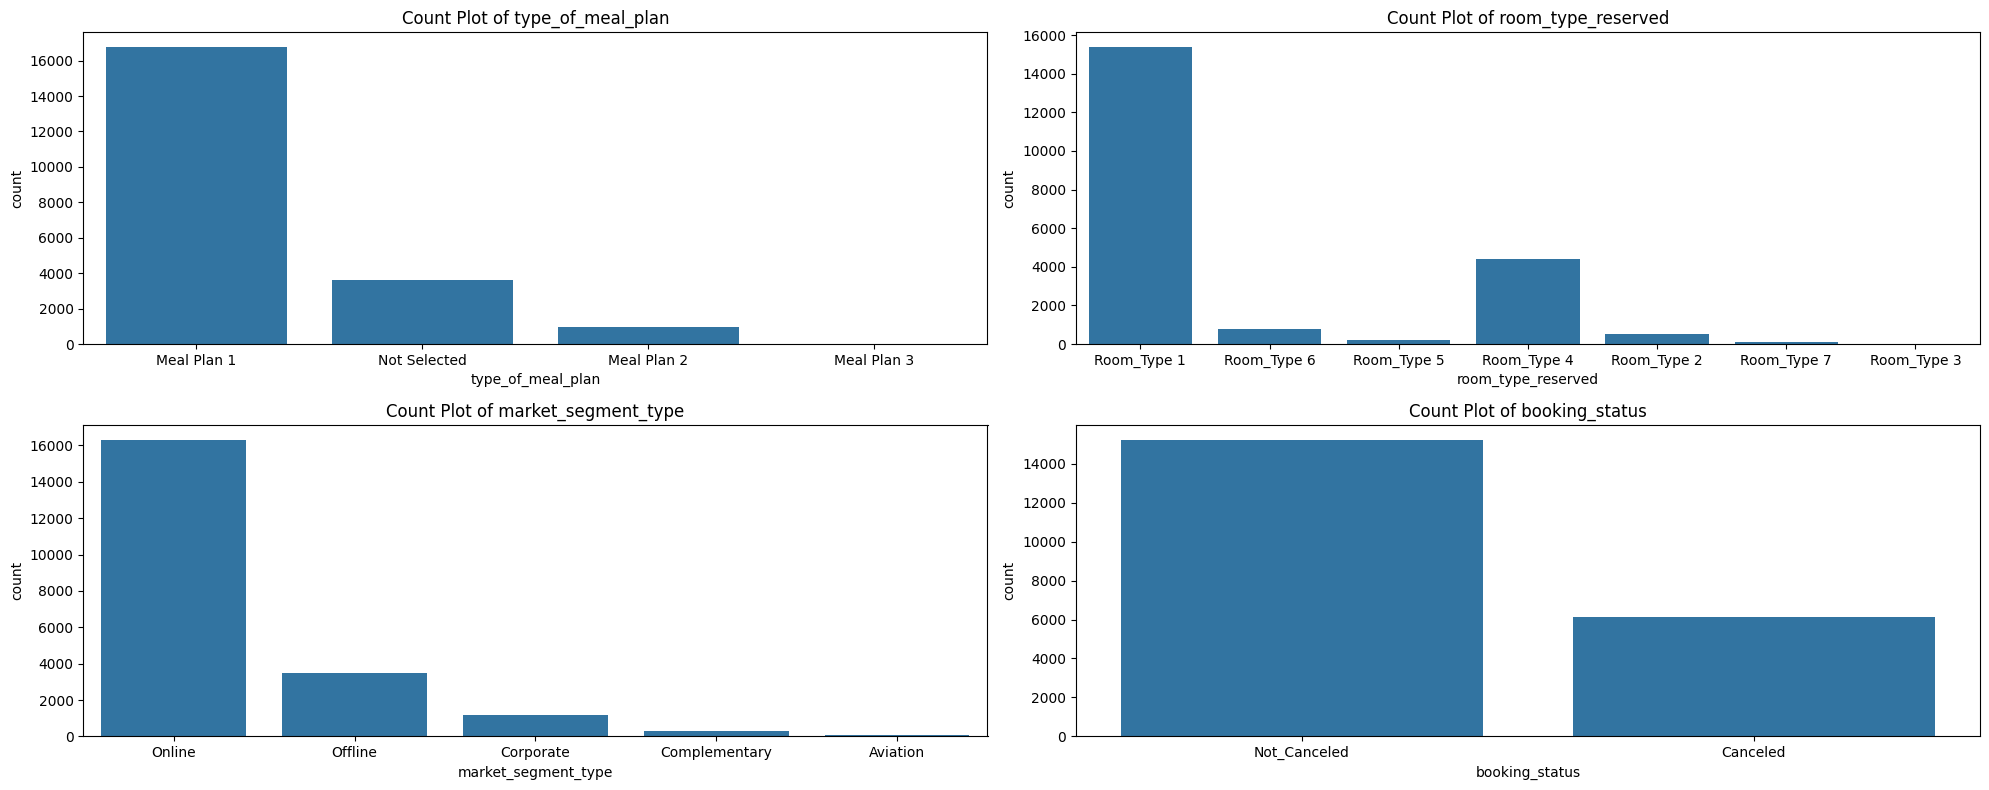

In [7]:
## ..................Plot Categorical Columns.................. ##

def plot_categorical(df, categorical_cols):
    fig, ax = plt.subplots(len(categorical_cols)//2, 2, figsize=(20, len(categorical_cols) * 2))
    ax = ax.ravel()

    if len(categorical_cols) == 0:
        print("No categorical columns to plot.")
        return

    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=df, ax=ax[i])
        ax[i].set_title(f"Count Plot of {col}")

    plt.tight_layout()
    plt.show()

plot_categorical(df, categorical_cols)

In [8]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


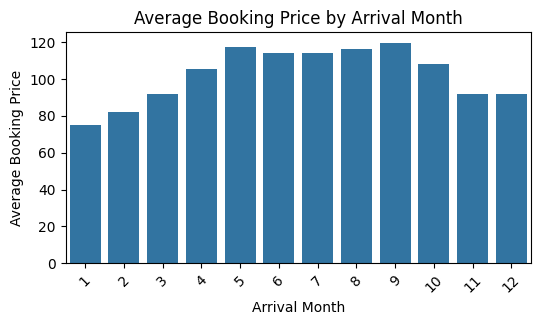

In [9]:
## .................. Special Plot between Arrival Month and Average Booking Price .................. ##
def plot_arrival_month_vs_avg_booking_price(df):
    plt.figure(figsize=(6, 3))
    sns.barplot(x='arrival_month', y='avg_price_per_room', data=df, ci=None)
    plt.title('Average Booking Price by Arrival Month')
    plt.xlabel('Arrival Month')
    plt.ylabel('Average Booking Price')
    plt.xticks(rotation=45)
    plt.show()

plot_arrival_month_vs_avg_booking_price(df)

### BIVARIATE ANALYSIS

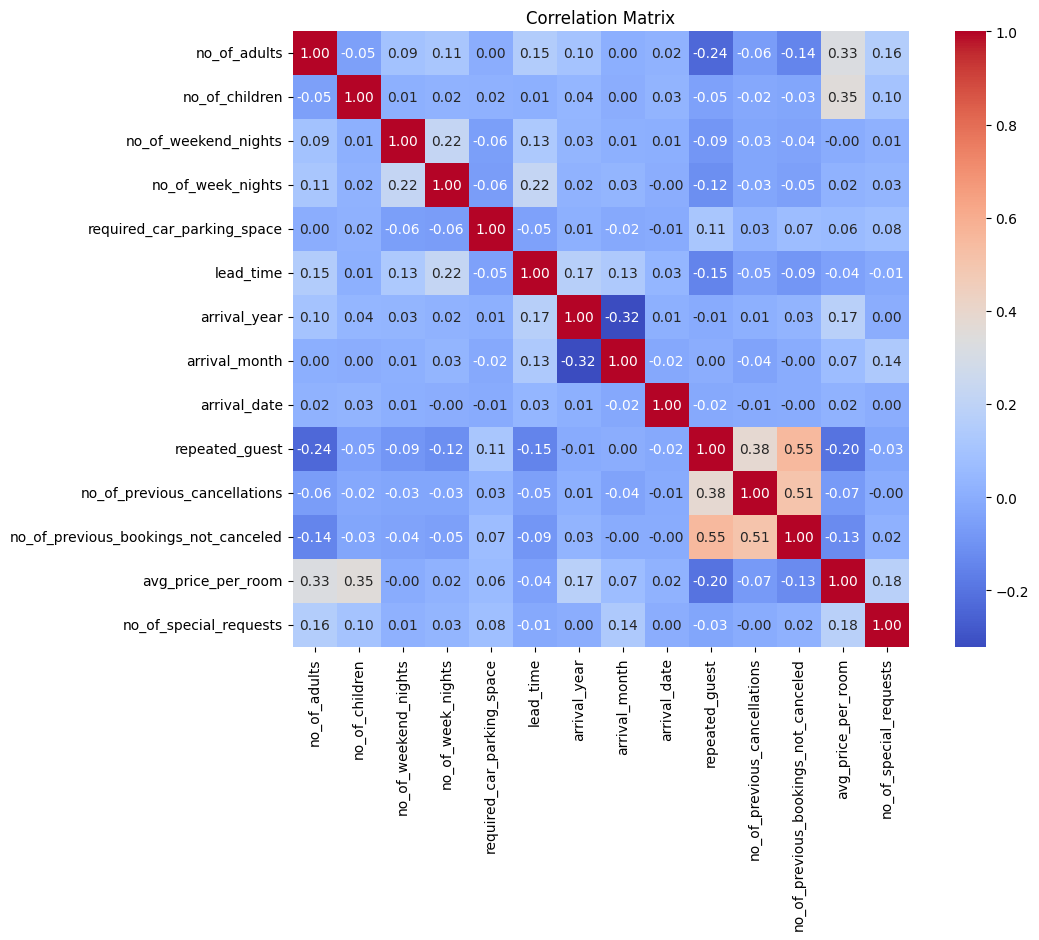

In [10]:
## ..................Correlation Matrix.................. ##
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

## Data Processing 

In [11]:
display(df.shape)
display(df.info())
df.head()

(21359, 18)

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [12]:
##............. Converting Object Type to numerical data using label encoding  ............ ##

from sklearn.preprocessing import LabelEncoder

In [13]:
Label_encoder = LabelEncoder()
mappings = {}
for col in categorical_cols:
        
        df[col] = Label_encoder.fit_transform(df[col])
        mappings[col] = {label: code for label, code in zip(Label_encoder.classes_, Label_encoder.transform(Label_encoder.classes_))}

print("Label Encoding Mappings:")
mappings

Label Encoding Mappings:


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [14]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [16]:
## ............. Check for Multicollinearity ............ ##

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X  = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) Data:")
print(vif_data)

Variance Inflation Factor (VIF) Data:
                                 feature           VIF
0                                  const  4.100197e+07
1                           no_of_adults  1.341180e+00
2                         no_of_children  1.282459e+00
3                   no_of_weekend_nights  1.073215e+00
4                      no_of_week_nights  1.125260e+00
5                      type_of_meal_plan  1.178228e+00
6             required_car_parking_space  1.036105e+00
7                     room_type_reserved  1.549859e+00
8                              lead_time  1.406287e+00
9                           arrival_year  1.288533e+00
10                         arrival_month  1.248028e+00
11                          arrival_date  1.003605e+00
12                   market_segment_type  1.704297e+00
13                        repeated_guest  1.765576e+00
14          no_of_previous_cancellations  1.396559e+00
15  no_of_previous_bookings_not_canceled  1.712854e+00
16                    avg_p

> Since, for all features, the VIF factor is very small i.e.  < 5. Hence we can say that the features are not multicollinear.

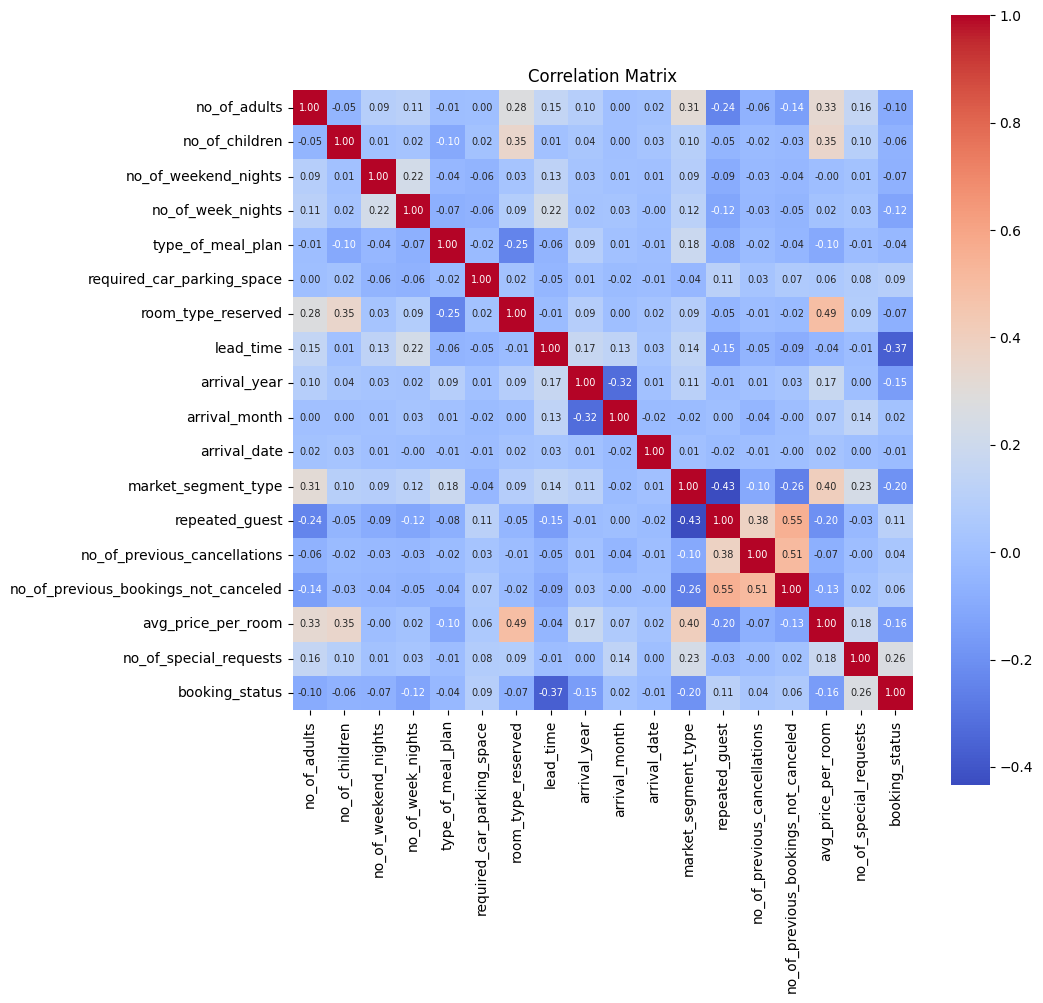

In [17]:
## Make correlation matrix heatmap
corr = df.corr()

## Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, annot_kws={"size": 7})

plt.title('Correlation Matrix')
plt.show()



In [18]:
## ............. Check for Skewness ............ ##    
skew = df.apply(lambda x: x.skew())   
skew

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [19]:
df.columns.tolist()[:-1]

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [20]:
## Apply Log Transformation to reduce skewness 

for col in df.columns.tolist()[:-1]:
    if abs(df[col].skew()) > 0.5:  # Threshold for skewness
        df[col] = np.log1p(df[col])  # Apply log transformation

## Check skewness after transformation
skew_after = df.apply(lambda x: x.skew())
print("Skewness after transformation:")
print(skew_after)

Skewness after transformation:
no_of_adults                            -0.305652
no_of_children                           3.029609
no_of_weekend_nights                     0.088633
no_of_week_nights                       -0.375219
type_of_meal_plan                        1.555100
required_car_parking_space               4.538315
room_type_reserved                       1.112290
lead_time                               -0.748187
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -3.617649
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                      -4.962253
no_of_special_requests                   0.298868
booking_status                          -0.942305
dtype: float64


In [21]:
## ............. Balancing the dataset ............ ##
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [22]:
## Oversampling the minority class using

## Spltting the dataset into features and target variable
X = df.drop(columns=['booking_status'])
y = df['booking_status']

def oversample_minority_class(df, target_column):
    # Separate majority and minority classes
    majority_class = df[df[target_column] == df[target_column].value_counts().idxmax()]
    minority_class = df[df[target_column] == df[target_column].value_counts().idxmin()]
    
    # Oversample minority class to match majority class size
    minority_class_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)
    
    # Combine majority class and oversampled minority class
    df_resampled = pd.concat([majority_class, minority_class_oversampled], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Split into features and target variable
    X_resampled = df_resampled.drop(columns=[target_column])
    y_resampled = df_resampled[target_column]
    
    return X_resampled, y_resampled

X_resampled, y_resampled = oversample_minority_class(df, 'booking_status')

print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: booking_status
1    15231
0     6128
Name: count, dtype: int64
Resampled dataset shape: booking_status
1    15231
0    15231
Name: count, dtype: int64


In [23]:
## Creaating balaced df:
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)
print("Balanced Dataset Shape:", balanced_df.shape)
print("Balanced Dataset Head:")
balanced_df.head()

Balanced Dataset Shape: (30462, 18)
Balanced Dataset Head:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0.0,1.098612,1.098612,0.0,0.0,0.000000,4.997212,7.610358,9,25,1.609438,0.0,0.0,0.0,4.872139,1.098612,1
1,2,0.0,0.000000,1.609438,0.0,0.0,0.000000,4.983607,7.610358,5,18,1.386294,0.0,0.0,0.0,4.403666,0.000000,1
2,2,0.0,0.000000,1.386294,0.0,0.0,0.000000,3.951244,7.610358,7,26,1.609438,0.0,0.0,0.0,4.919251,0.693147,1
3,1,0.0,0.000000,1.386294,0.0,0.0,1.386294,2.708050,7.610358,1,19,1.609438,0.0,0.0,0.0,4.364372,0.000000,1
4,2,0.0,1.098612,1.098612,0.0,0.0,0.000000,4.262680,7.610358,4,23,1.609438,0.0,0.0,0.0,4.566429,0.000000,0


## FEATURE SELECTION

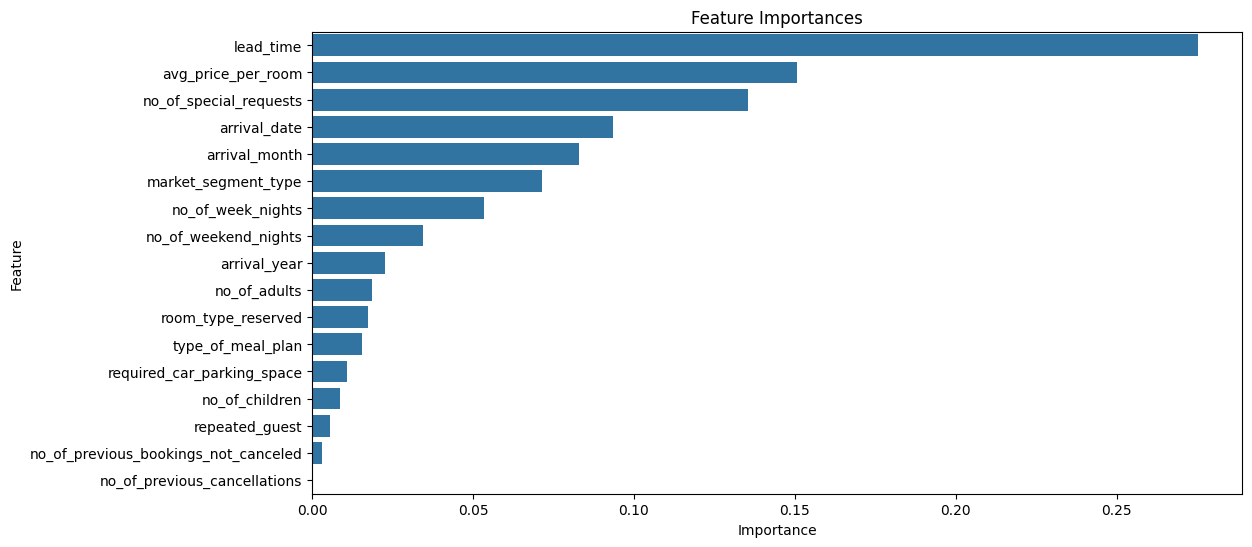

In [ ]:
from sklearn.ensemble  import RandomForestClassifier

## Splitting the dataset into training and testing sets
X = balanced_df.drop(columns=['booking_status'])
y = balanced_df['booking_status']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

## Get feature importances
importances = model.feature_importances_
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')   
plt.show()

In [27]:
## selecting only top 10 features based on importance
top_features = feature_importances.head(10)['Feature'].tolist()
print("Top 10 Features based on Importance:")
print(top_features)

Top 10 Features based on Importance:
['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_date', 'arrival_month', 'market_segment_type', 'no_of_week_nights', 'no_of_weekend_nights', 'arrival_year', 'no_of_adults']


In [28]:
## Creating a new DataFrame with only the top features
top_features_df = balanced_df[top_features + ['booking_status']]
print("Top Features DataFrame Shape:", top_features_df.shape)
print("Top Features DataFrame Head:")
top_features_df.head()

Top Features DataFrame Shape: (30462, 11)
Top Features DataFrame Head:


,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,4.997212,4.872139,1.098612,25,9,1.609438,1.098612,1.098612,7.610358,2,1
1,4.983607,4.403666,0.000000,18,5,1.386294,1.609438,0.000000,7.610358,2,1
2,3.951244,4.919251,0.693147,26,7,1.609438,1.386294,0.000000,7.610358,2,1
3,2.708050,4.364372,0.000000,19,1,1.609438,1.386294,0.000000,7.610358,1,1
4,4.262680,4.566429,0.000000,23,4,1.609438,1.098612,1.098612,7.610358,2,0


In [29]:
## Copying the top features DataFrame to a new variable
final_df = top_features_df.copy()


## MODEL TRAINING 

In [30]:
final_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,4.997212,4.872139,1.098612,25,9,1.609438,1.098612,1.098612,7.610358,2,1
1,4.983607,4.403666,0.000000,18,5,1.386294,1.609438,0.000000,7.610358,2,1
2,3.951244,4.919251,0.693147,26,7,1.609438,1.386294,0.000000,7.610358,2,1
3,2.708050,4.364372,0.000000,19,1,1.609438,1.386294,0.000000,7.610358,1,1
4,4.262680,4.566429,0.000000,23,4,1.609438,1.098612,1.098612,7.610358,2,0


In [31]:
## Extracting X and y from the final DataFrame
X_final = final_df.drop(columns=['booking_status'])
y_final = final_df['booking_status']

## Splitting the final dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24369, 10), (6093, 10), (24369,), (6093,))

In [33]:
## Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


## Imprort Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

metrics = {

    'models' : [],
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1_score' : [],

}

In [34]:
## Training each classifier and evaluating performance

for model_name, model in classifiers.items():
    ## Fit the model
    model.fit(X_train, y_train)
    ## Make predictions
    y_pred = model.predict(X_test)
    ## Calculate metrics    

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    ## Append metrics to the dictionary
    metrics['models'].append(model_name)
    metrics['accuracy'].append(accuracy)    
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1_score'].append(f1)

    print(f'Completed training and evaluation for {model_name}')

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)
# Display the metrics DataFrame
print("Model Performance Metrics:")
metrics_df

Completed training and evaluation for Logistic Regression
Completed training and evaluation for Decision Tree
Completed training and evaluation for Random Forest
Completed training and evaluation for Gradient Boosting
Model Performance Metrics:


,models,accuracy,precision,recall,f1_score
0,Logistic Regression,0.751518,0.759837,0.735391,0.747414
1,Decision Tree,0.909568,0.955126,0.859488,0.904787
2,Random Forest,0.930084,0.963881,0.893631,0.927428
3,Gradient Boosting,0.809946,0.793715,0.837492,0.815016


In [35]:
## finally Train the Random Forest model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform    

In [36]:
## Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

## Define the hyperparameter grid
param_grid = {
    'n_estimators': randint(50, 200),       # Number of trees in the forest
    'max_depth': randint(5, 20),            # Maximum depth of the tree
    'min_samples_split': randint(2, 10),    # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),      # Minimum number of samples required to be at a leaf node
    'max_features': uniform(0.1, 0.9),      # Number of features to consider when looking for the best split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}


# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of iterations
    cv=5,        # Number of cross-validation folds
    verbose=2,   # Verbosity level
    random_state=42,
    scoring='f1',  # Scoring metric
    n_jobs=-1    # Use all available cores
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FA2F17490>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027FA669D190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FA6554E50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FA66AF590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FA6617BD0>},
                   random_state=42, scoring='f1', verbose=2)

In [37]:
## Get the best parameters and best score
best_params = rf_random_search.best_params_
best_score = rf_random_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Randomized Search:", best_score)

Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': np.float64(0.6504878444394528), 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 138}
Best F1 Score from Randomized Search: 0.8868779749787293


In [38]:
#  Get best model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best) 
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best) 


print("Best Model Performance on Test Set:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")


Best Model Performance on Test Set:
Accuracy: 0.9010
Precision: 0.9145
Recall: 0.8848
F1 Score: 0.8994


In [39]:
## Saving this model
import joblib
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Best Random Forest model saved as 'random_forest_model.pkl'.")

## Saving the final DataFrame
final_df.to_csv('final_df.csv', index=False)
print("Final DataFrame saved as 'final_df.csv'.")

Best Random Forest model saved as 'random_forest_model.pkl'.
Final DataFrame saved as 'final_df.csv'.


In [43]:
import joblib

## Loading the saved model and DataFrame to verify
loaded_model = joblib.load("random_forest_model.pkl")
# loaded_model = joblib.load('random_forest_model.pkl')
# loaded_df = pd.read_csv('E:/MLOps_Projects/Hotel_Reservation_prediction/notebook/final_df.csv')

print("Loaded Model:", loaded_model)


Loaded Model: RandomForestClassifier(max_depth=16,
                       max_features=np.float64(0.6504878444394528),
                       min_samples_split=5, n_estimators=138, random_state=42)


In [44]:
features = np.array([[60,1,106.2,4,1,4,2,1,0,3]])

In [45]:
type(loaded_model)

sklearn.ensemble._forest.RandomForestClassifier

In [48]:
## Check if the model is predicting or not: 
# sample_data = X_test.sample(1, random_state=1)
predictions = loaded_model.predict(features)
print("Sample Data for Prediction:", features)

print("Predictions for Sample Data:", predictions[0])



Sample Data for Prediction: [[ 60.    1.  106.2   4.    1.    4.    2.    1.    0.    3. ]]
Predictions for Sample Data: 1
